# Visualization of Shelter Cat Outcome Data

In this step, we visualize the data we extracted from the AAC database with the additional features we that were added to the data in the previous notebook. The visualization of the outcomes and variables of which we have an interest will help us better understand the data and how the variables relate to each other. This knowledge will be crucial when selecting which variables we should focus on and include in our prediction during the model building phase.

The libraries that we will use to visualize the data include [seaborn](https://seaborn.pydata.org/), an excellent library for creating beautiful visualizations with an easy to use interface. We will also take advantage of some of the built-in plotting functionality available in [pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

## Getting Started

First, call the [`%matplotlib inline`](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) magic function for displaying the output visualizations inline in the notebook.

In [1]:
%matplotlib inline

Also, import the libraries that will be used in this section of the analysis. The [`warnings`](https://docs.python.org/3.1/library/warnings.html) library is also imported to hide warning messages issued by `seaborn`, as of the time of this writing some of the functions that will be used raise some future deprecation messages.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

The data that we extracted and manipulating was saved at the end of the last section.

In [3]:
cats_df = pd.read_csv('../../data/cats_df_clean.csv')

## Visualizing the Shelter Cat Data

Before diving into the plotting, it is a good idea to set any desired formatting settings using the [`set`](http://seaborn.pydata.org/generated/seaborn.set.html). Here, we set the font scale to 1.7x and replace the default seaborn palette with the available ['Set1'](http://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) palette that is good for representing categorical data. We also change the default gray background with white gridlines with a plain white background using the [`set_style`](https://seaborn.pydata.org/generated/seaborn.set_style.html) function and the 'ticks' theme. A list of available themes for seaborn can be found [here](https://python-graph-gallery.com/104-seaborn-themes/).

In [4]:
sns.set(font_scale=1.7, palette=sns.color_palette("Set1", n_colors=15, desat=.5)) #sns.xkcd_palette(sns.xkcd_rgb))
sns.set_style('ticks')

Now, we have many variables we can plot and compare, but where should we start? This is another opportunity for the analyst to draw on their knowledge of the data and find important variables to begin visualizing based on their previous experience. As an example, shelters will not adopt a cat or kitten that has not been spayed or neutered to help control the cat population. Thus, the likely outcome of an intact cat will most likely be a transfer or unfortunately euthanasia if the cat is sick. Also, intact males are often far more unruly and likely to have behavior issues. 

In general, most potential adopters are not too concerned with the gender of a cat unless they are looking to complement a cat already living in their household (male/female arrangements are usually the most harmonious). The age of the cat is another important factor. With this knowledge, plotting the sex upon the outcome and if the cat was of kitten or adult age at the time of outcome will likely be a good starting point.

The [`factorplot`](https://seaborn.pydata.org/generated/seaborn.factorplot.html) function in seaborn is excellent for plotting several categorical variables at one time.

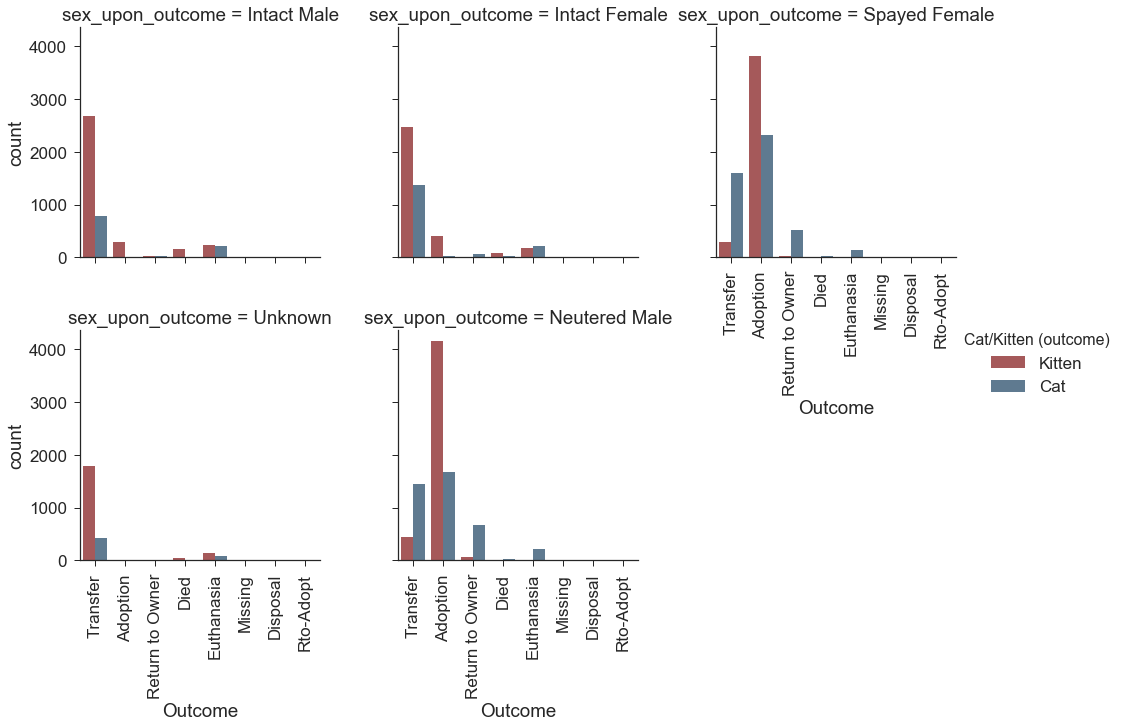

In [5]:
g = sns.factorplot(x='outcome_type', hue='Cat/Kitten (outcome)', col='sex_upon_outcome', 
               col_wrap=3, data=cats_df, kind='count', size=4.5)

g.set_xticklabels(rotation=90)
g.set_xlabels('Outcome')

Our previous knowledge of shelter outcomes aligns well with how the data is plotted. We see intact male and female cats are transferred, of which the majority are kittens, which would make sense as kittens would be less likely to be spayed or neutered due to their age. Neutered and spayed cats and kittens usually end up being adopted, with kittens being adopted more frequently than adult cats. This result also aligns with our past knowledge as kittens are typically adopted much faster than adult cats. Cats of adult age are also much more likely to be transferred to another facility or returned to their owner.

Knowing that a significant portion of outcomes are transfers to other facilities, let's dig a little deeper into the outcome subtypes to see if any transfer subtypes occur more frequently than others depending on the sex and intact status of the cat, as well as the age group.

We plot the outcome subtypes by the categorical variables in which we are interested using the `factorplot` function of seaborn again, but instead of a bar graph, we use lines to help distinguish the groupings.

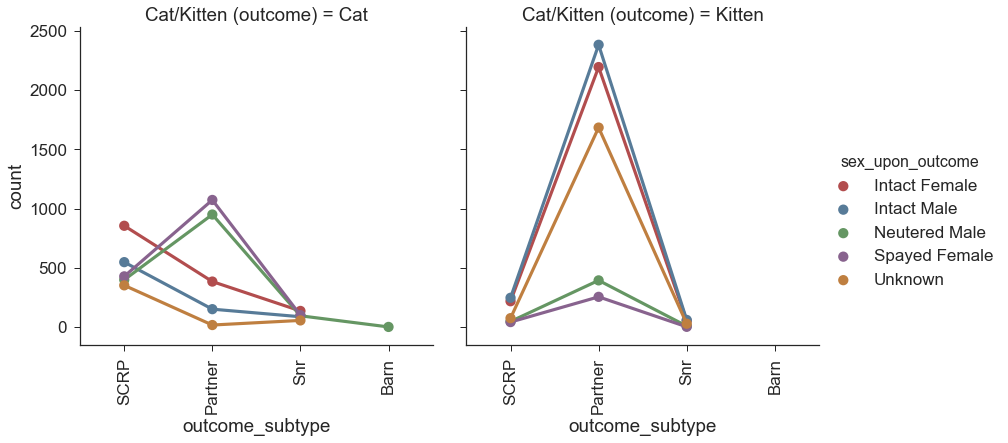

In [6]:
transfer_subtype_counts = cats_df[cats_df['outcome_type'] == 'Transfer']
transfer_subtype_counts = transfer_subtype_counts.groupby(['sex_upon_outcome', 'Cat/Kitten (outcome)'])['outcome_subtype'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_subtype', y='count', hue='sex_upon_outcome', col='Cat/Kitten (outcome)', 
               data=transfer_subtype_counts, size=6)

g.set_xticklabels(rotation=90)

The majority of kittens are transferred to partner facilities as we noted earlier, most likely to receive veterinary treatment and to be spayed/neutered once the kitten is approximately five months of age. We also see there are relatively few trapping related (SCRP and SNR) outcomes, as one would likely expect as kittens are not likely to wander far from their mother or colony. Conversely, there are more cats of adult age with the stray capture program outcome, which aligns with our previous assumptions.

We are already starting to uncover likely strong predictors of the outcome! Let's dig a little deeper into the outcomes of cats based on their age and their intact status. Does the age in years of a cat have a significant impact on their outcome? Also, are there any outcome subtypes that appear more frequently than others? To answer these questions, the [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) function from seaborn will be used, which is very handy for plotting categorical variables together like a swarm of points.

As we do not need to plot all 77k+ rows of the data, we leverage the handy [`sample()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) of pandas DataFrames to grab 200 random samples (rows) of each outcome type. The sampled DataFrame is then reshaped to be used for plotting using the [`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) method.

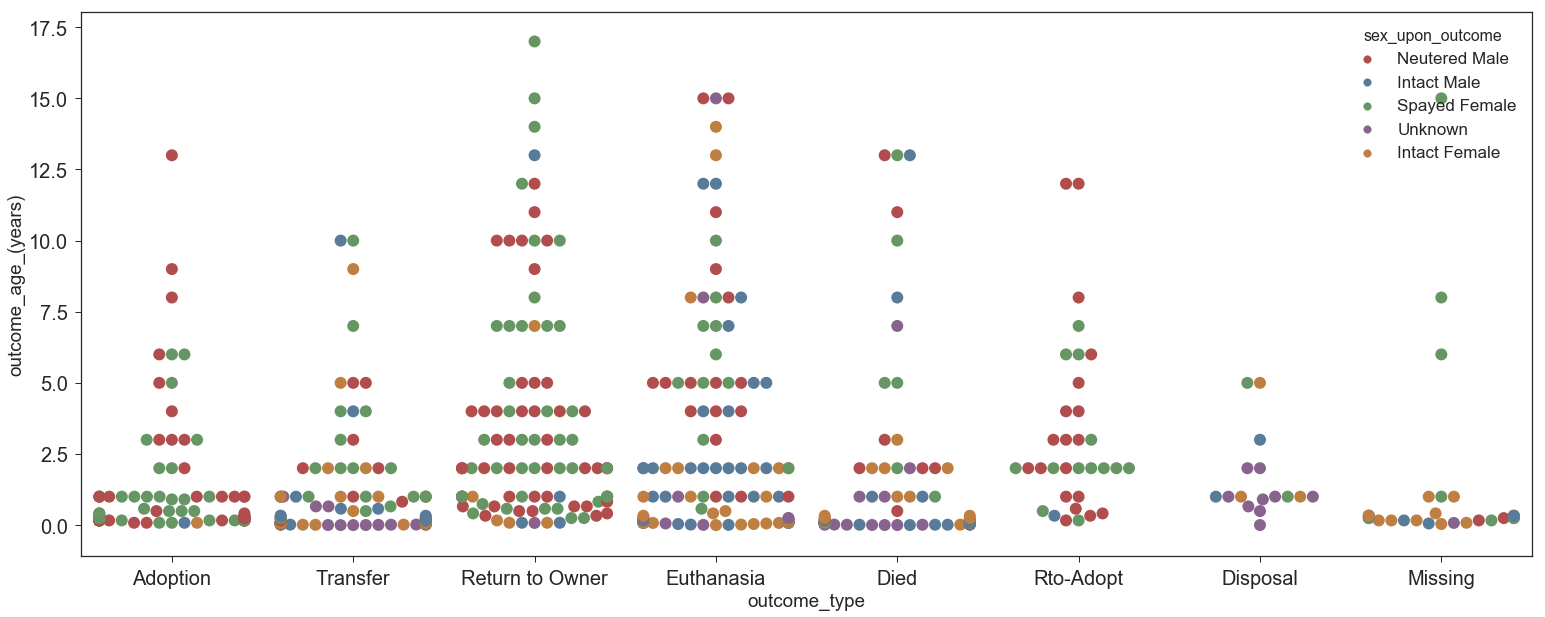

In [7]:
cat_outcomes_sample = cats_df.sample(frac=1.0).groupby(['outcome_type']).head(100)

plt.figure(figsize=(26,10))
g = sns.swarmplot(x='outcome_type', y='outcome_age_(years)', hue='sex_upon_outcome', 
                  data=cat_outcomes_sample, size=12)

g.tick_params(labelsize=20)

Interestingly, neutered males are make up the bulk of the returned to owner outcome, possibly indicating males are more prone to wandering off from the owner's home. Judging from the clumping of points near the bottom of the graph, it also appears the majority of cats coming through the shelter are below five years of age. Cats subjected to euthanasia or passed away in the shelter look to be mostly intact males and females, primarily in the younger age range.

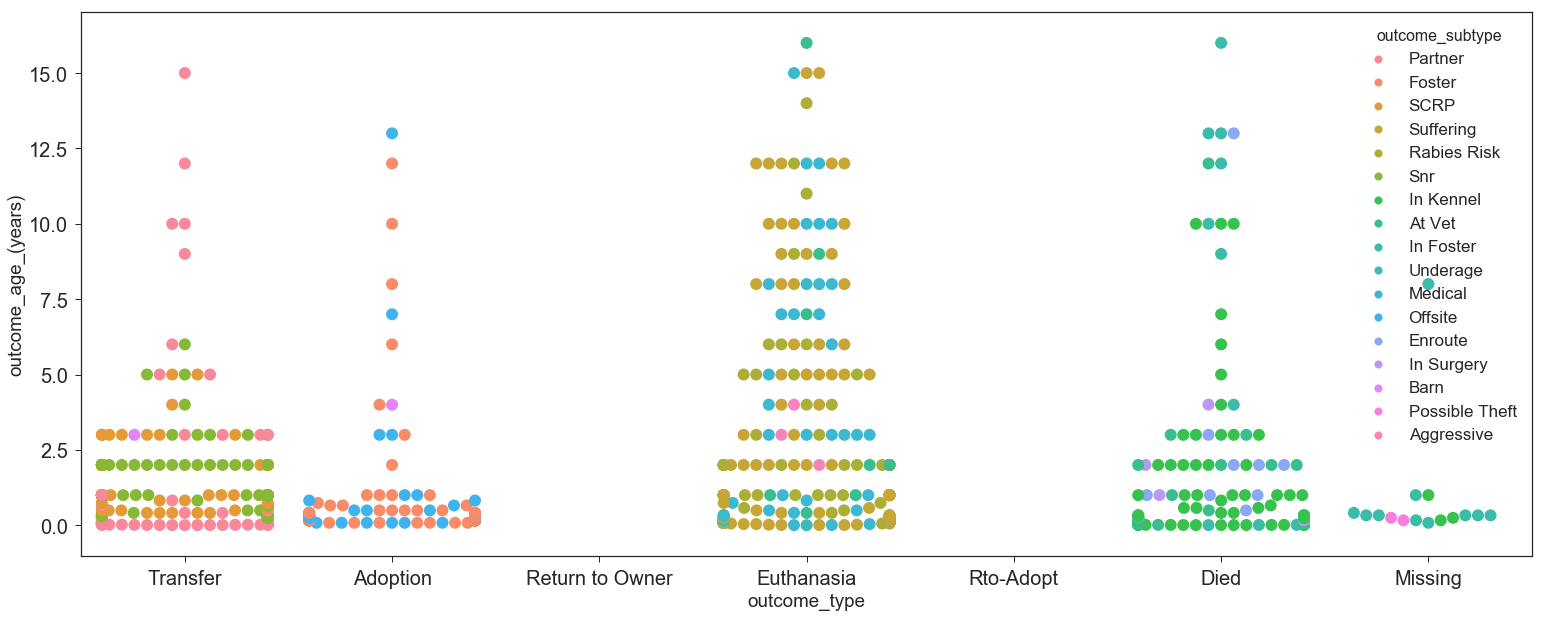

In [8]:
cat_suboutcomes_sample = cats_df.sample(frac=1.0).groupby(['outcome_subtype']).head(100)

plt.figure(figsize=(26,10))
g = sns.swarmplot(x='outcome_type', y='outcome_age_(years)', hue='outcome_subtype', 
                  data=cat_suboutcomes_sample, size=12)

g.tick_params(labelsize=20)

Digging a little further into the more specific outcomes as defined by the `outcome_subtype` column in our data, we see the return to owner outcome does not have a subtype outcome. Unlike the other outcome types and subtypes, the transfer outcome is clustered around the 0-3 years of age group. The majority of transfer subtypes appear to be to partner facilities and at the veterinarian, likely to receive spay/neuter surgery and for vaccinations and examinations. The SCRP is Austin's [Stray Cat Return Program](http://www.maddiesfund.org/austin-animal-services-stray-cat-return-program.htm), a progressive trap, neuter, and release program.

The majority of euthanasia cases were due to suffering and possible rabies risk, or other medical reasons. Perhaps somewhat alarmingly, the bulk of outcomes that resulted in death were at a kennel facility. Could this result be due to the quality of the kennel facility or is it related more to the health of the animal upon entering the facility? Unfortunately, we are not able to tell with the data available; however, it would be worthwhile to investigate further to see if there are ways to reduce the number of deaths occurring in kennels.

The "busy" season for cats is typically in the middle of the year, particularly June and July when females are in heat and the weather is usually fair. This time of the year is when shelters often intake a lot more kittens and intact strays as part of trapping programs. 

Plotting the counts of the various outcome types over time by month will allow us to see if this trend holds as we would expect to see much more activity in the summer months compared to the rest of the year.

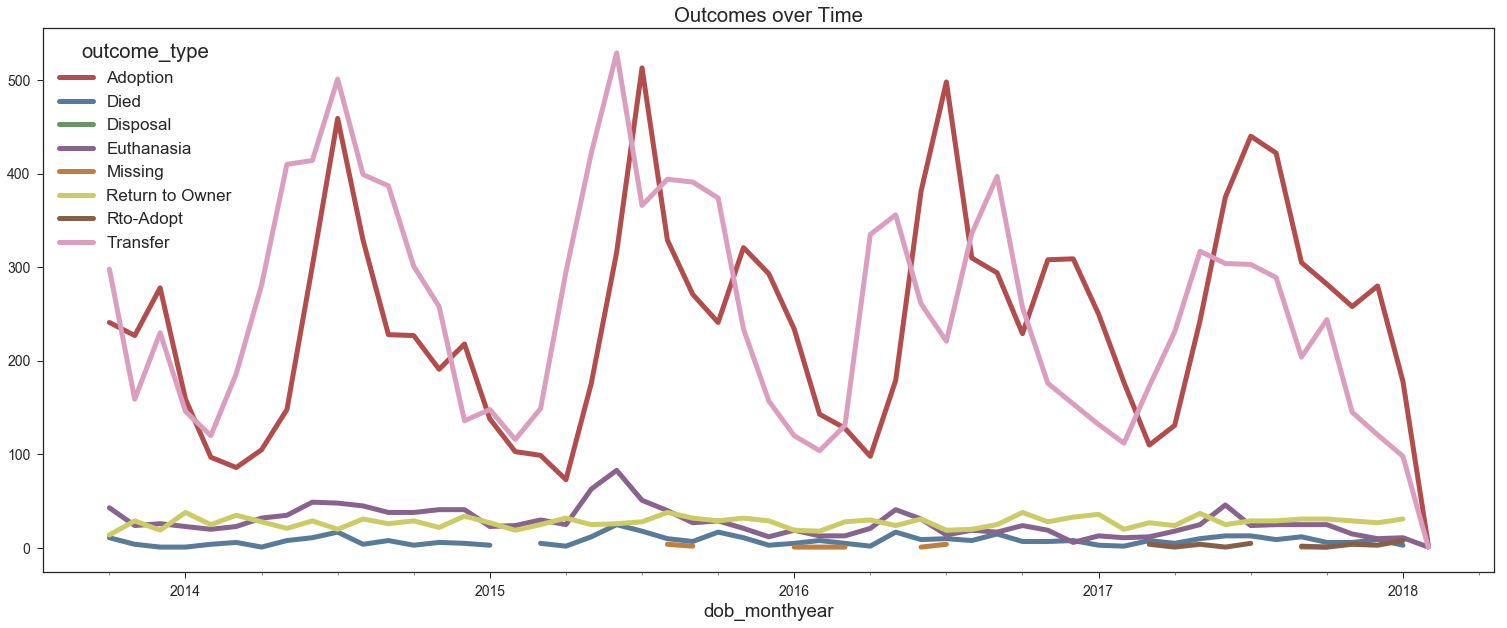

In [9]:
monthyear_outcomes = pd.pivot_table(cats_df, index=['dob_monthyear'], 
                                    columns=['outcome_type'], values='count', aggfunc=np.sum)
monthyear_outcomes.index = pd.to_datetime(monthyear_outcomes.index)

monthyear_outcomes.plot(fontsize=14, linewidth=5, title='Outcomes over Time', figsize=(26,10))

As expected, we see a massive spike in the number of adoptions and transfers in the middle of the year and is consistent across the years where data is available. According to the AAC's website, about 90% of the outcomes are adoptions or transfers to partner facilities. Therefore the comparative flatness of the other outcomes is not surprising.

There appears to be a noticeable spike in the number of euthanasia outcomes in June of 2015.

To get a better look at the other outcomes to see if there are any trends, let's filter the data to exclude adoptions and transfers and plot the data similar to before.

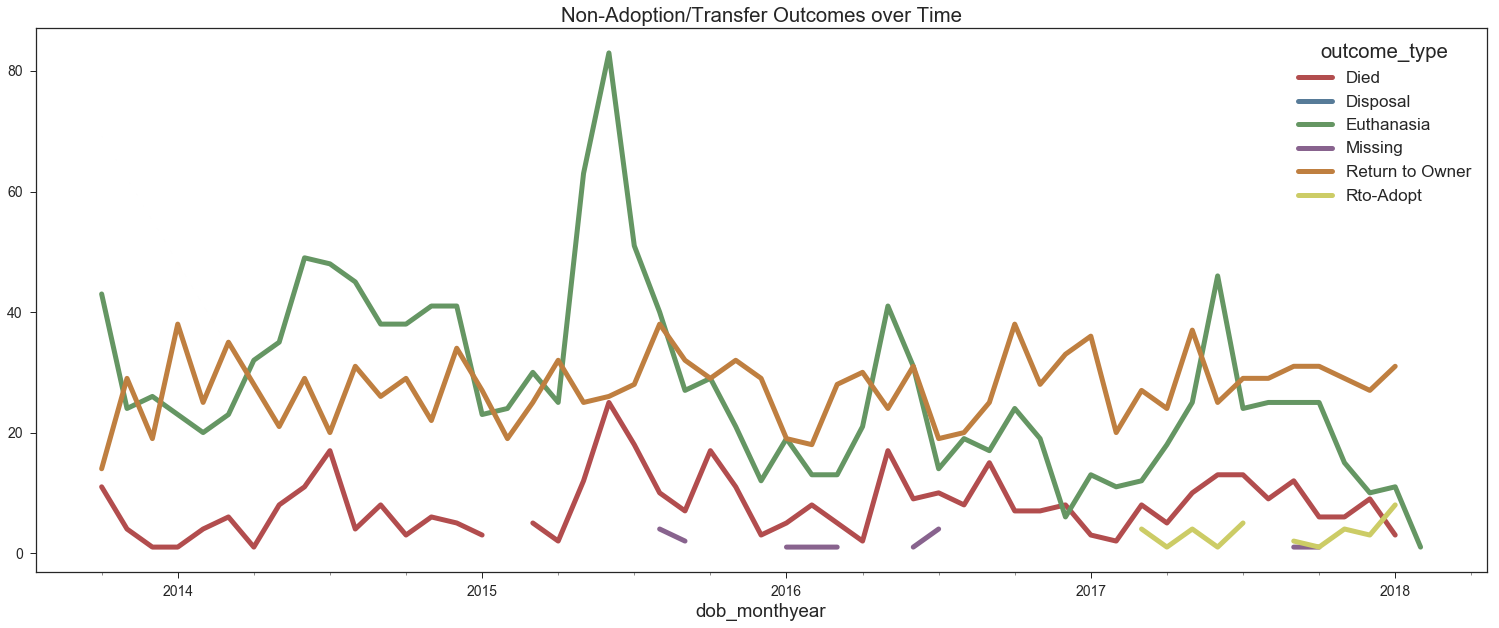

In [10]:
monthyear_outcomes2 = monthyear_outcomes.filter(items=['Died', 'Disposal', 'Euthanasia', 'Missing', 
                                                      'Return to Owner', 'Rto-Adopt'])

monthyear_outcomes2.plot(fontsize=14, linewidth=5, figsize=(26,10), 
                         title='Non-Adoption/Transfer Outcomes over Time')

Cats getting lost and picked up by the shelter system and then returned to their owners (presumably after a microchip scan) seems to have a somewhat monthly frequency. Deaths occurring in the shelter also look to spike or trend upwards in the middle of the year, likely as a result of the increased number of kittens being born and the relative competitiveness of feral and intact stray breeding. This trend of deaths rising in the summer and middle of the year is also concurrent with euthanasia outcomes.

The significant spike in euthanasia cases in the middle of 2015 is unfortunate, but why is the increase so substantial compared to other years? Although not wholly relevant to our analysis, it may be worth investigating the rise for curiosity's sake.

Earlier, we noticed cats of kitten age were adopted or transferred to partner facilities much more frequently than adult cats, and that a significant proportion of the cats in our data appear to be less than five years old. Do we see any significant trend or grouping of outcomes based on the age group of the cat? Does this happen to change at all depending on the gender of the cat?

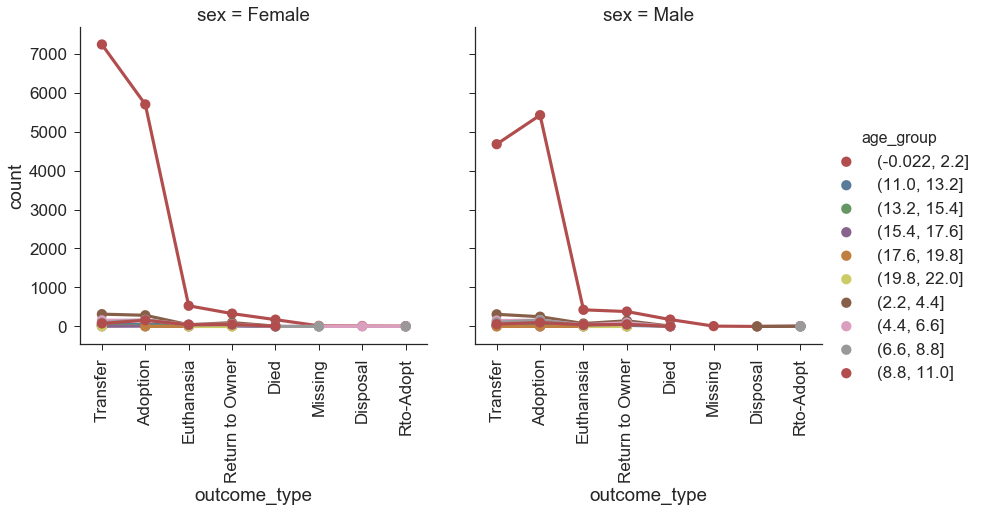

In [11]:
agegroup_counts = cats_df.groupby(['age_group', 'sex'])['outcome_type'].value_counts().reset_index(name='count')

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex',
                   data=agegroup_counts, size=6)

g.set_xticklabels(rotation=90)

Cats of kitten age and under two years old make up the majority of records by far, as our previous observations alluded to somewhat. There are comparatively fewer male cats as well, whom also seem to be less likely to be transferred to a partner facility. 

Since the number of cats under approximately two years of age is skewing the graph, let's filter that age group out to get a visualization of the other age groups.

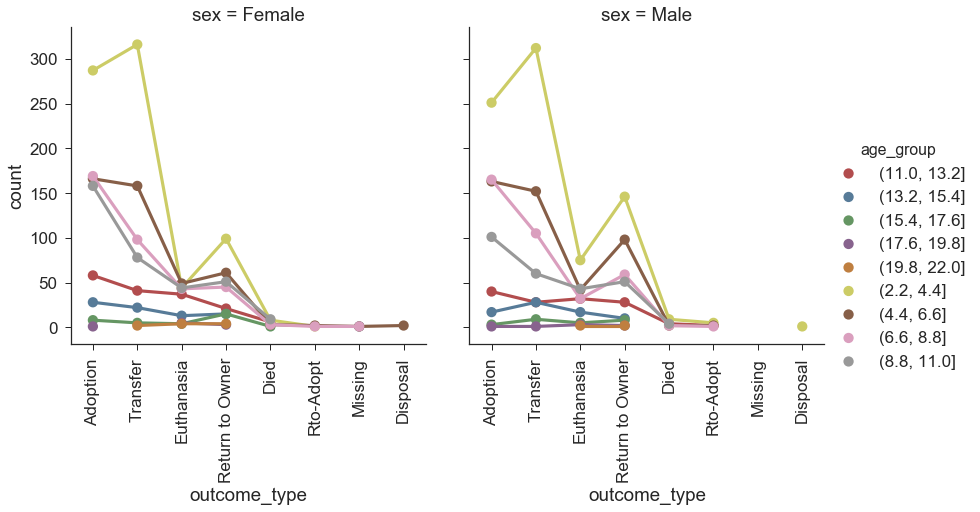

In [12]:
agegroup_counts2 = agegroup_counts[agegroup_counts['age_group'] != agegroup_counts['age_group'].unique()[0]]

g = sns.factorplot(x='outcome_type', y='count', hue='age_group', col='sex', 
                   data=agegroup_counts2, size=6)

g.set_xticklabels(rotation=90)

Cats under approximately five years of age make up the majority of cat records, which we noted earlier. The most common outcomes remain adoption or transfer to a partner facility. Interestingly, there doesn't appear to be any significant deviation in outcomes as the age of the cat increases. Therefore, we see that the actual age of the cat does not factor into the probability of a particular outcome as much as if the cat is of kitten age or not.

## Summary

The visualization of the shelter cat outcome data helped us find some critical indicators of outcome type, which will be of much help in the model building phase when we need to select which features or categorical variables are the most important to include in our model. I find it's often helpful to summarize the findings in a simple bulleted list that can be referred back to whenever needed.

### Some Key Findings

* Intact males and females of kitten age (six months or less) are transferred more than any other outcome.
    - The result is consistent with general shelter practice as intact cats are spayed or neutered before becoming available for adoption.
    - The kittens are more likely to be transferred to partner facilities, possibly to receive treatments such as vaccinations and to be spayed or neutered.
* Neutered and spayed kittens are adopted much more frequently than adult cats.
    - Kittens are typically adopted faster (less time in the shelter) than adult cats.
* The cats entering the shelter are usually under five years of age.
* Adoptions and transfers are very seasonal, peaking in the summer months and continues to drop until the next summer.
    - Other outcomes such as return to owner, are less seasonal and tend to have close to a monthly frequency (visual approximation from the time series charts).
* There does not appear to be any significant relation in the outcome to the age group of the cat, other than if the cat is of kitten age or not.

In the next post, we will build a prediction model using [scikit-learn](http://scikit-learn.org/stable/) to predict the outcome of a cat as it enters the shelter.